In [1]:
from donthackme import *

In [2]:
from requests_oauthlib import OAuth1
url = 'https://api.twitter.com/1.1/search/tweets.json'
auth = OAuth1(CONSUMER_KEY, CONSUMER_SECRET, TOKEN, TOKEN_SECRET)

In [3]:
import requests

In [4]:
params = {'q': 'oslo',
          'count': 100}

In [5]:
def infinite_tweets(result_json):
    next_key = 'refresh_url'
    while True:
        for status in result_json['statuses']:
            yield status
        if next_key not in result_json['search_metadata']:
            return
        result_json = requests.get(url + 
             result_json['search_metadata'][next_key],
                                   auth=auth).json()

In [7]:
from itertools import islice

In [8]:
import urlparse

In [9]:
def get_netlocs(start, n):
    for status in islice(infinite_tweets(start), n):
        for url in status['entities']['urls']:
                yield urlparse.urlparse(url['expanded_url']).netloc

In [10]:
from collections import Counter

In [11]:
result = requests.get(url, auth=auth, params=params).json()

In [12]:
result['statuses']

[{u'contributors': None,
  u'coordinates': None,
  u'created_at': u'Tue Mar 14 18:57:57 +0000 2017',
  u'entities': {u'hashtags': [{u'indices': [16, 24], u'text': u'TheTide'},
    {u'indices': [25, 34], u'text': u'Electric'},
    {u'indices': [67, 77], u'text': u'TheSwitch'},
    {u'indices': [91, 94], u'text': u'EV'},
    {u'indices': [113, 119], u'text': u'China'}],
   u'symbols': [],
   u'urls': [],
   u'user_mentions': [{u'id': 132288724,
     u'id_str': u'132288724',
     u'indices': [3, 14],
     u'name': u'Kirill Klip',
     u'screen_name': u'kirillklip'}]},
  u'favorite_count': 0,
  u'favorited': False,
  u'geo': None,
  u'id': 841725100642729984,
  u'id_str': u'841725100642729984',
  u'in_reply_to_screen_name': None,
  u'in_reply_to_status_id': None,
  u'in_reply_to_status_id_str': None,
  u'in_reply_to_user_id': None,
  u'in_reply_to_user_id_str': None,
  u'is_quote_status': False,
  u'lang': u'en',
  u'metadata': {u'iso_language_code': u'en', u'result_type': u'recent'},
  u'

In [33]:
c = Counter(get_netlocs(result, 100))

In [35]:
c.most_common(5)

[(u'tribune.com.pk', 23),
 (u'dlvr.it', 5),
 (u'bit.ly', 2),
 (u'www.premiumherald.com', 2),
 (u'www.archdaily.com', 1)]

In [43]:
urls = [url for url, count in c.most_common(5)]
counts = [count for url, count in c.most_common(5)]

In [37]:
import matplotlib.pyplot as plt

In [38]:
%matplotlib inline

In [53]:
xs = range(10)
ys = [x**2 for x in xs]

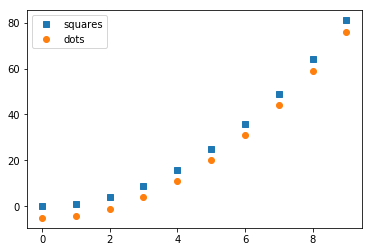

In [67]:
plt.plot(xs, ys, 's', label='squares')
plt.plot(xs, [y-5 for y in ys], 'o', label='dots')
plt.legend()

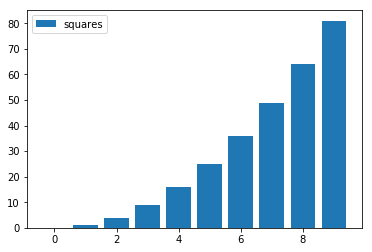

In [61]:
plt.bar(xs, ys, label='squares')
plt.legend()

In [62]:
x_vals = range(len(urls))
x_vals

[0, 1, 2, 3, 4]

In [63]:
counts, urls

([23, 5, 2, 2, 1],
 [u'tribune.com.pk',
  u'dlvr.it',
  u'bit.ly',
  u'www.premiumherald.com',
  u'www.archdaily.com'])

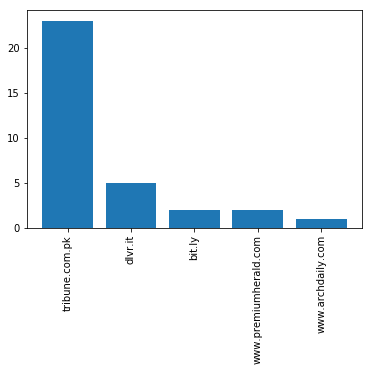

In [66]:
plt.bar(x_vals, counts)
plt.xticks(x_vals, urls, rotation='vertical')
None